![](https://c4.wallpaperflare.com/wallpaper/391/915/826/diamond-photography-wallpaper-preview.jpg)

#<center>**Diamond Price Prediction**<center/>
**<h2><center>Kaggle Competition<center/></h2>**


<h1><center><font color="Blue">About The Dataset</font><center/><h1/>

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Import Libraries 

In [327]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor,RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#sklearn.model_selection: providing functions for model selection and evaluation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

#for gradient boosting implementation, optimized for performance and flexibility
import xgboost as xgb # XGBoost stands for "Extreme Gradient Boosting
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

Read The Train Data

In [328]:
train=pd.read_csv('train.csv')

## Data Understanding

### Data dictionary



1- price: The price of the diamond in US dollars.

2- carat: The weight of the diamond, ranging from 0.2 to 5.01 carats.

3- cut: The quality of the diamond's cut, categorized as Fair, Good, Very Good, Premium, and Ideal.

4- color: The color of the diamond, ranging from J (worst) to D (best).

5- clarity: A measurement of how clear the diamond is, categorized from I1 (worst) to IF (best). The clarity scale includes SI2, SI1, VS2, VS1, VVS2, VVS1, and IF.

6- x: The length of the diamond in millimeters, ranging from 0 to 10.74 mm.

7- y: The width of the diamond in millimeters, ranging from 0 to 58.9 mm.

8- z: The depth of the diamond in millimeters, ranging from 0 to 31.8 mm.

9- depth: The total depth percentage, calculated as 2 * z / (x + y), with values ranging from 43 to 79.

10- table: The width of the top of the diamond relative to its widest point, with values ranging from 43 to 95.

### Data Exploration 

In [329]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [330]:
train.tail()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65
43151,43152,0.33,Ideal,G,VS2,61.2,55.0,743,4.49,4.46,2.74


In [331]:
print("Original shape is ")
train.shape

Original shape is 


(43152, 11)

In [332]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


* The float64 data type is used for columns that contain decimal numbers.

* The int64 data type is used for columns that contain integer values.

* The object data type is used for columns that contain categorical values.

In [333]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* The carat column ranges from 0.2 to 5.01, with a mean of approximately 0.798.

* The depth column ranges from 43 to 79, with a mean of approximately 61.747.

* The table column ranges from 43 to 95, with a mean of approximately 57.458.

* The price column ranges from 326 to 18,823, with a mean of approximately 3,929.492.

* The x, y, and z columns represent the dimensions of the diamonds and have similar statistics.

### *4C’s* of a Diamond
> carat

> cut

> color

> clarity


In [334]:
train["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [335]:
train["cut"].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

<Axes: >

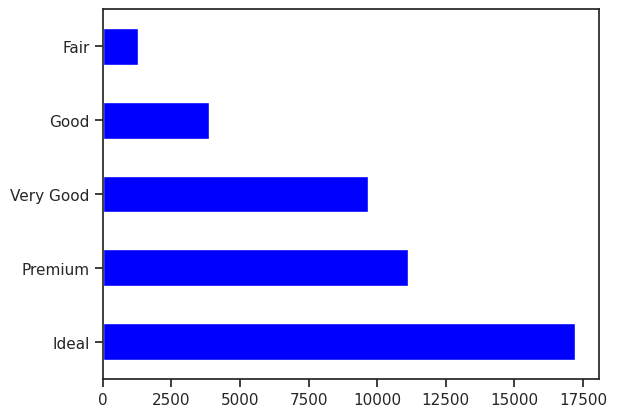

In [336]:
train["cut"].value_counts().plot.barh(color='Blue')

Based on the figure above:
cut: the most cut is ideal, follows it premium then very good.

In [337]:
train["color"].unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

The color categories range from 'D' (best, most colorless) to 'J' (worst, more yellow or brown tint).

In [338]:
train["color"].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

<Axes: >

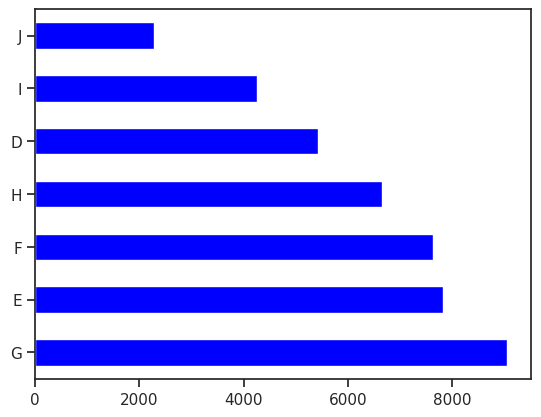

In [339]:
train["color"].value_counts().plot.barh(color='Blue')

Based on the figure above:
color: G, E, F are the most colors.

In [340]:
train["clarity"].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

The clarity categories range from 'I1' (worst clarity) to 'IF' (best clarity).



* SI2: Slightly Included 2

* VVS2: Very Very Slightly Included 2

* VS2: Very Slightly Included 2

* IF: Internally Flawless

* VS1: Very Slightly Included 1

* SI1: Slightly Included 1

* VVS1: Very Very Slightly Included 1

* I1: Included 1 (worst clarity)

In [341]:
train["clarity"].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

<Axes: >

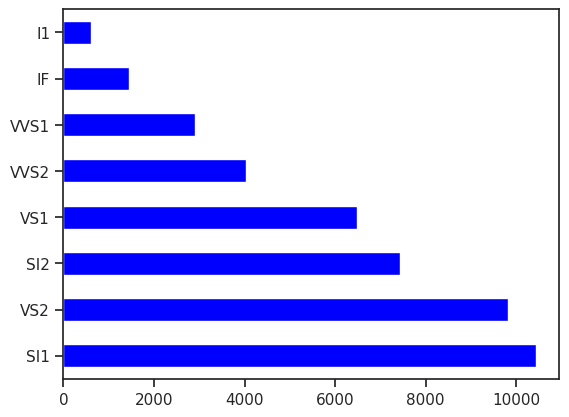

In [342]:
train["clarity"].value_counts().plot.barh(color='Blue')

Based on the figure above:
clarity: SI1, SI2, VS2 are the most clarity


## check missing values

In [343]:
train.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Data Visualization 


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: >]], dtype=object)

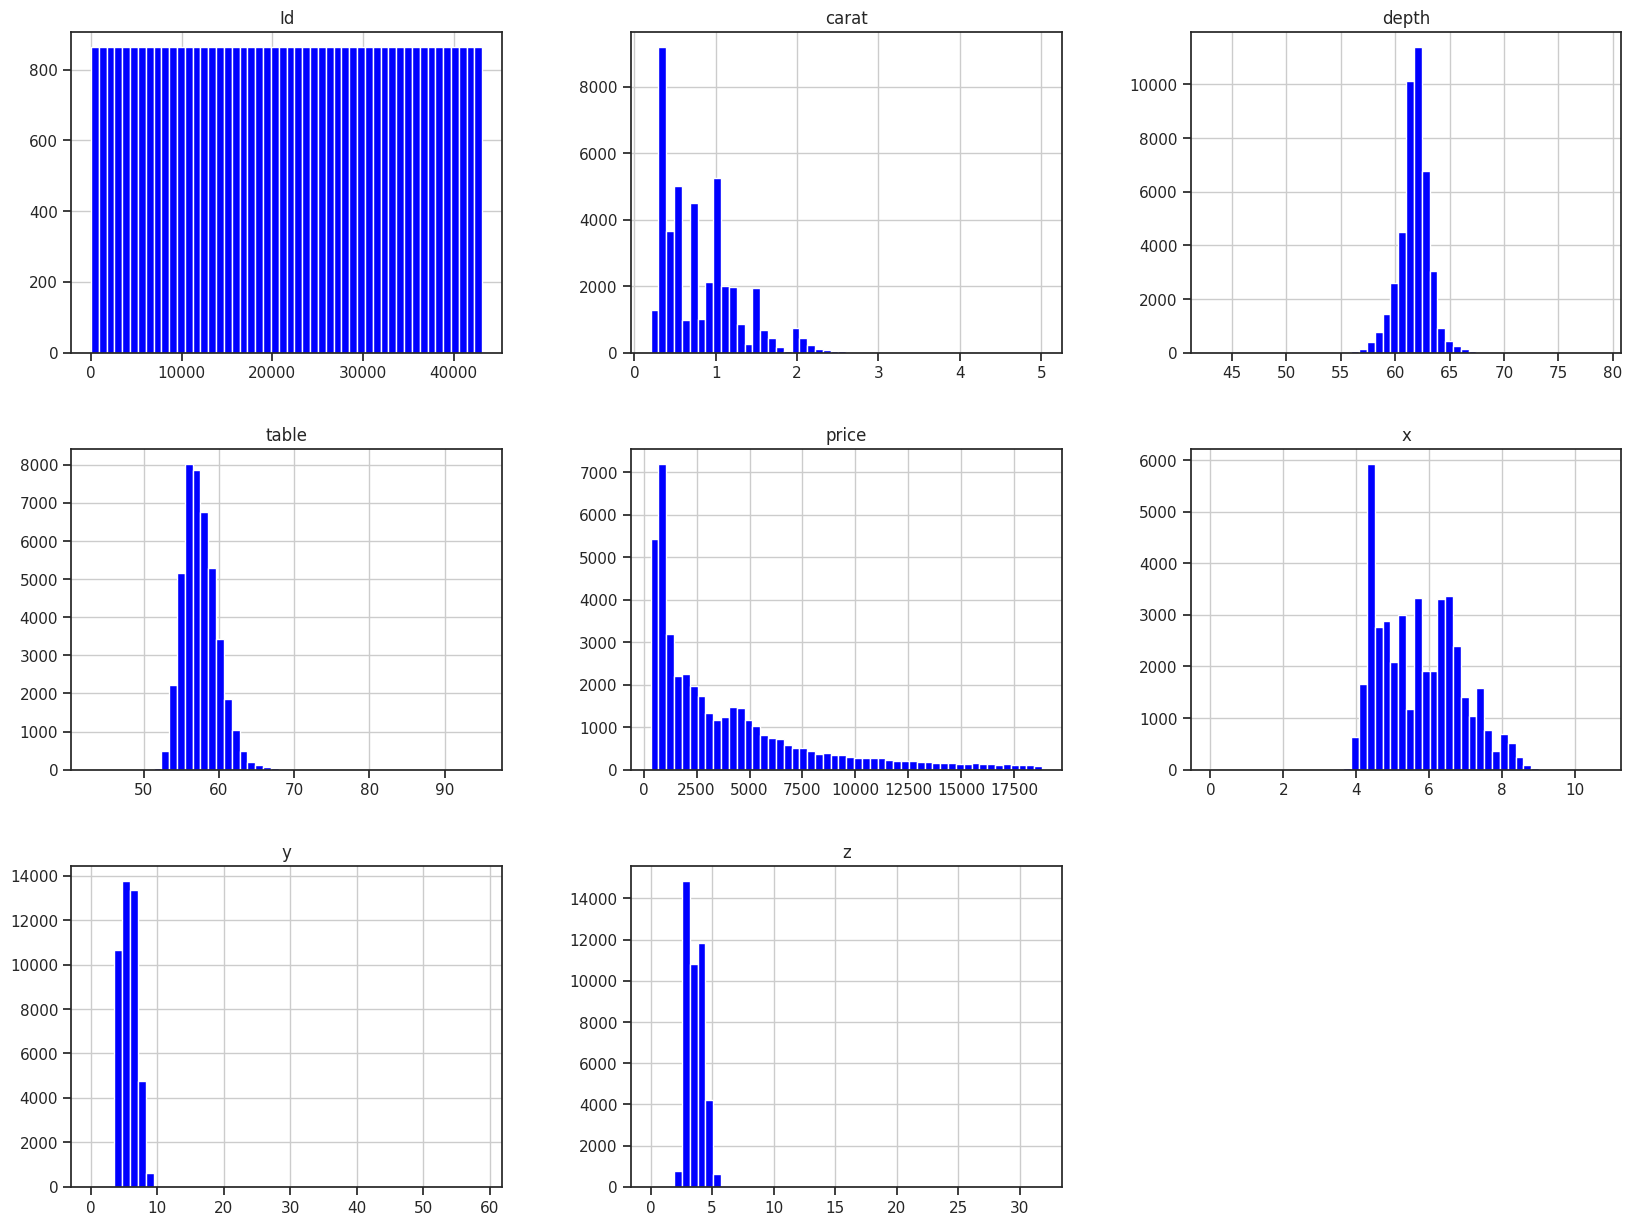

In [344]:
train.hist(bins=50, figsize=(20, 15), color='Blue')

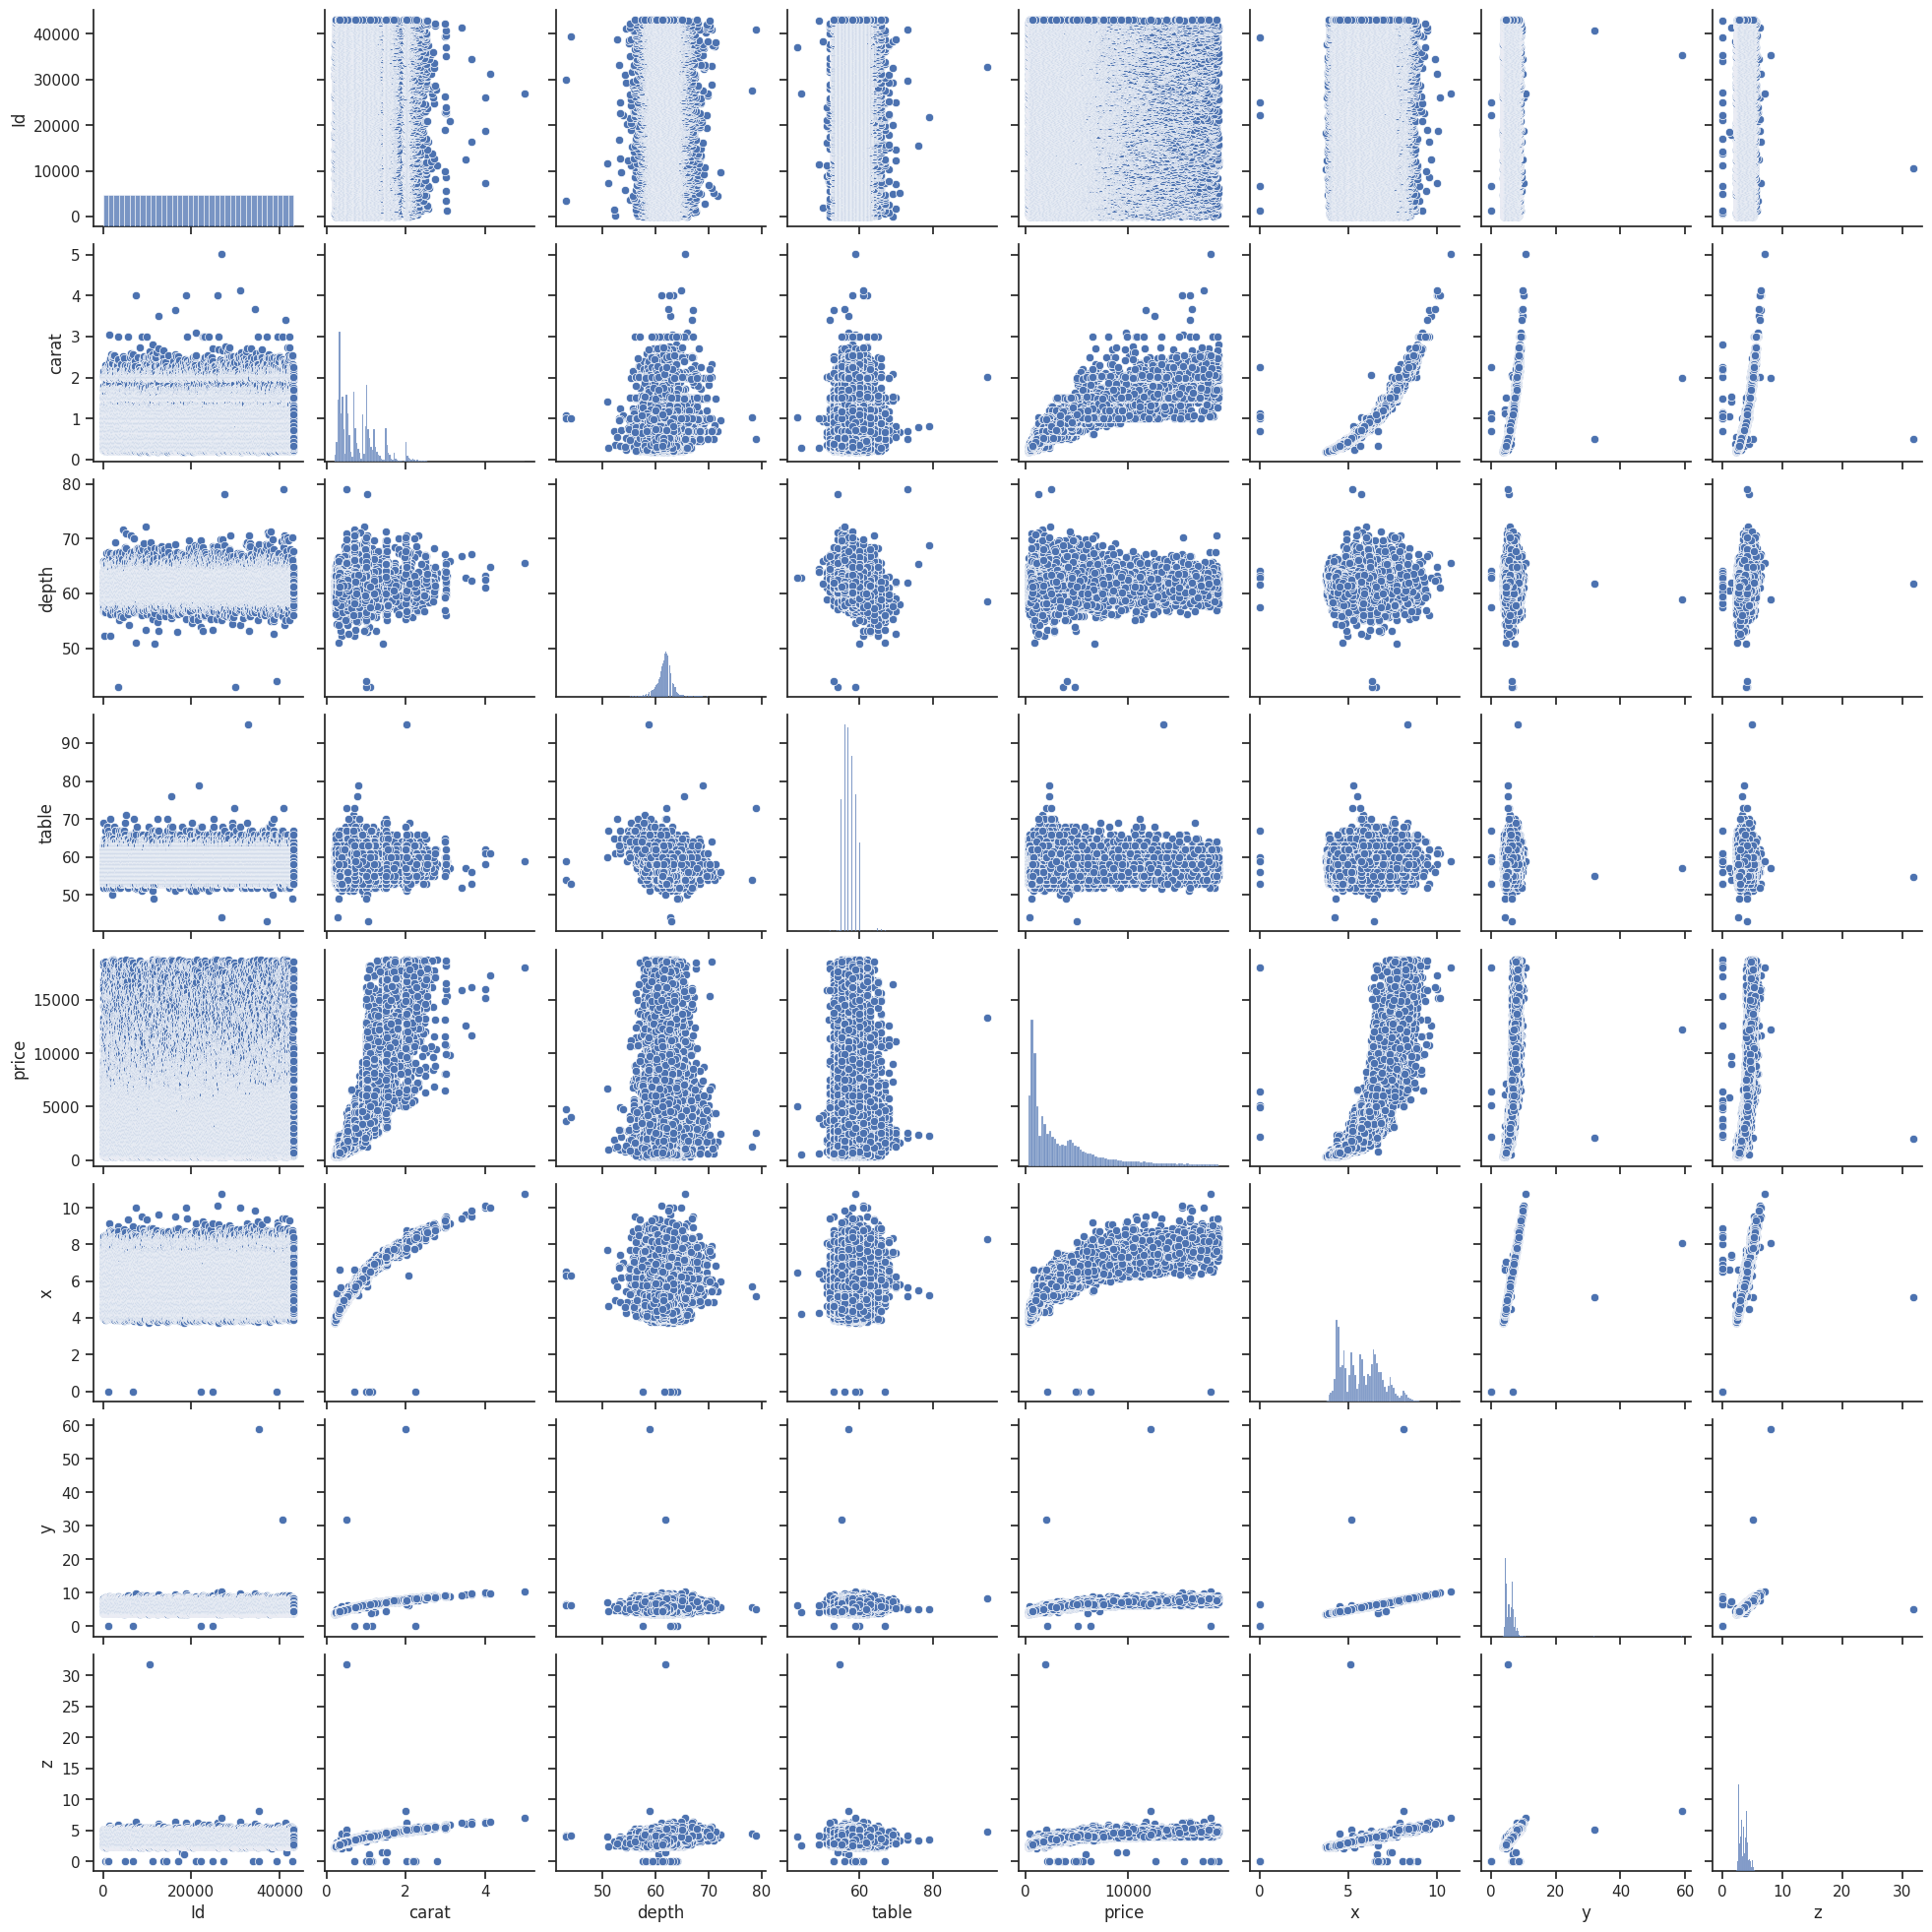

In [345]:
sns.set(style="ticks")
blue_palette = sns.color_palette("Blues")
sns.pairplot(train, palette=blue_palette)
plt.show()

<Axes: xlabel='clarity', ylabel='price'>

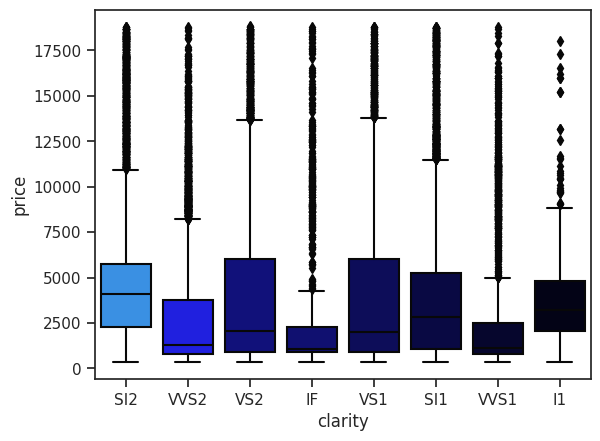

In [346]:
custom_palette = ["#1E90FF", "#0000FF", "#00008B", "#000080", "#000066", "#00004C", "#000033", "#000019"]
sns.boxplot(x=train["clarity"], y=train["price"], palette=custom_palette)

<Axes: xlabel='color', ylabel='price'>

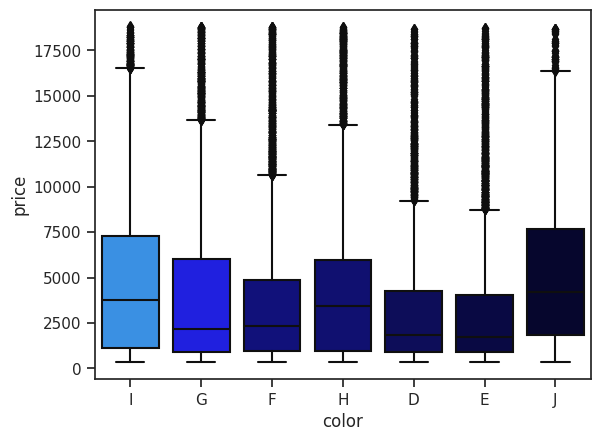

In [347]:
custom_palette = ["#1E90FF", "#0000FF", "#00008B", "#000080", "#000066", "#00004C", "#000033", "#000019"]
sns.boxplot(x=train["color"], y=train["price"], palette=custom_palette)

<Axes: xlabel='cut', ylabel='price'>

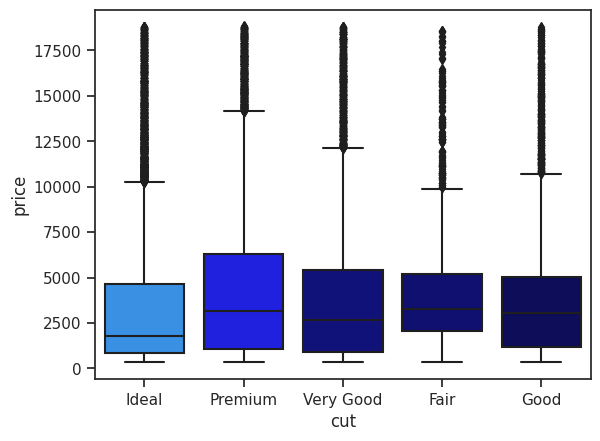

In [348]:
custom_palette = ["#1E90FF", "#0000FF", "#00008B", "#000080", "#000066", "#00004C", "#000033", "#000019"]
sns.boxplot( x=train["cut"], y=train["price"], palette=custom_palette)

## Heatmap correlation

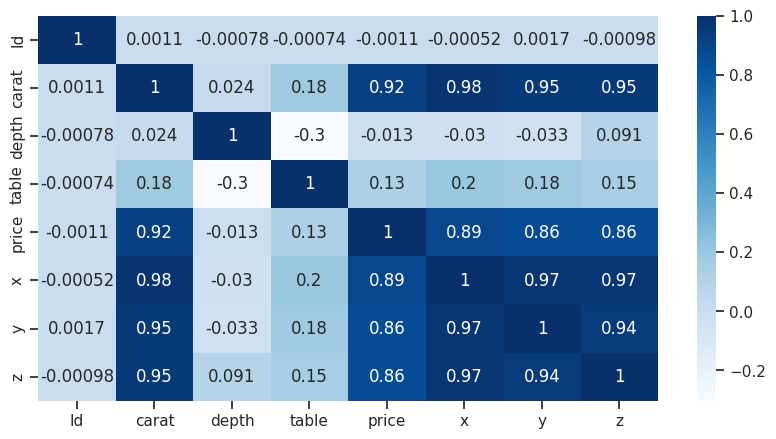

In [349]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(train.corr(), annot=True, cmap='Blues')
plt.show()

## Data Preparation for model

Read The Test Data

In [350]:
test = pd.read_csv("test.csv")

In [351]:
train.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [352]:
train.dropna(axis=0, inplace=True)

In [353]:
train.fillna(train.median(), inplace=True)

In [354]:
train.loc[train[(train['z']==0)|(train['z']>15)].index,'z']=train['z'].median()
train.loc[train[train['x']==0].index,'x']=train['x'].median()
train.loc[train[(train['y']==0)|(train['y']>15)].index,'y']=train['y'].median()
test.loc[test[(test['z']==0)|(test['z']>15)].index,'z']=test['z'].median()
test.loc[test[test['x']==0].index,'x']=test['x'].median()
test.loc[test[(test['y']==0)|(test['y']>15)].index,'y']=test['y'].median()

In [355]:
# Calculate LW Ratio
train['LW Ratio'] = train['x'] / train['y']
test['LW Ratio'] = test['x'] / test['y']

# Calculate volume
train['volume'] = train['x'] * train['y'] * train['z']
test['volume'] = test['x'] * test['y'] * test['z']

In [356]:
train=train.drop_duplicates()

In [357]:
train.corr()

,Id,carat,depth,table,price,x,y,z,LW Ratio,volume
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000648,-0.000643,-0.000633,-0.000802,0.001172
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.977784,0.976832,0.975467,0.138992,0.998623
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029599,-0.032235,0.092258,0.045408,0.006555
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.198049,0.191809,0.156532,0.138953,0.173721
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.887027,0.888681,0.881239,0.086290,0.923480
x,-0.000648,0.977784,-0.029599,0.198049,0.887027,1.000000,0.998577,0.990217,0.156226,0.979069
y,-0.000643,0.976832,-0.032235,0.191809,0.888681,0.998577,1.000000,0.989654,0.104372,0.978562
z,-0.000633,0.975467,0.092258,0.156532,0.881239,0.990217,0.989654,1.000000,0.139707,0.975785
LW Ratio,-0.000802,0.138992,0.045408,0.138953,0.086290,0.156226,0.104372,0.139707,1.000000,0.130536
volume,0.001172,0.998623,0.006555,0.173721,0.923480,0.979069,0.978562,0.975785,0.130536,1.000000


In [358]:
quality_map = {'Fair':0.1, 'Good':0.2, 'Very Good':0.3, 'Premium':0.4, 'Ideal':0.5}
color_map = {'D':0.7, 'E':0.6, 'F':0.5, 'G':0.4, 'H':0.3,'I':0.2,'J':0.1}
clarity_map = {'I1':0.1, 'SI2':0.2, 'SI1':0.3, 'VS2':0.4, 'VS1':0.5,'VVS2':0.6,'VVS1':0.7,'IF':0.8}

train['cut'] = train['cut'].replace(quality_map)
train['color'] = train['color'].replace(color_map)
train['clarity'] = train['clarity'].replace(clarity_map)

test['cut'] = test['cut'].replace(quality_map)
test['color'] = test['color'].replace(color_map)
test['clarity'] = test['clarity'].replace(clarity_map)

In [359]:
train = train.drop(['Id'] ,axis =1)

In [360]:
for feature_name in ['carat','depth','table','x','y','z','volume'] :
    median = train[feature_name].median()
    std = train[feature_name].std()
    train[feature_name] = (train[feature_name] - median) / (std)
    test[feature_name] = (test[feature_name] - median) / (std)

In [361]:
train["price_cat"] = pd.cut(train["price"],bins=5,labels=[1, 2, 3, 4, 5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=32)

for train_index, test_index in split.split(train, train["price_cat"]):
    Train =train.loc[train_index]
    val= train.loc[test_index]

In [362]:
train_y=np.log1p(Train['price'])
train_X=Train.drop("price", axis=1)

test_y=np.log1p(val['price'])
test_X=val.drop("price", axis=1)

In [363]:
id = test['Id']
test  =  test.drop(['Id'] , axis = 1)

In [368]:
train_X = train_X.drop("price_cat", axis=1)
test_X = test_X.drop("price_cat", axis=1)

model = xgb.XGBRegressor(objective='reg:squarederror', 
                         base_score=0.8, 
                         booster='gbtree', 
                         learning_rate=0.07, 
                         max_depth=8, 
                         n_estimators=200, 
                         random_state=32)

model.fit(train_X, train_y)
predictions = model.predict(test_X)
rmse = sqrt(mean_squared_error(np.expm1(test_y), np.expm1(predictions)))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 509.8199095100818


In [365]:
model2=LGBMRegressor(boosting_type =  'gbdt',
                            class_weight = 'balanced', 
                            importance_type =  'split', 
                            learning_rate =  0.05,
                            n_estimators = 475,
                            num_leaves = 31, 
                            objective = 'regression', 
                            random_state = 32)

model2.fit(train_X,train_y)
print(sqrt(mean_squared_error(np.expm1(test_y),np.expm1(model2.predict(test_X))))) 

364.83559869408725


In [366]:
model3=RandomForestRegressor(n_jobs = -1,random_state =42,max_features= 5, n_estimators=300)
model3.fit(train_X,train_y)
print(sqrt(mean_squared_error(np.expm1(test_y),np.expm1(model3.predict(test_X)))))

372.130781554914


In [369]:
estimators = [
('LGBM' , LGBMRegressor(boosting_type =  'gbdt',
                            class_weight = 'balanced', 
                            importance_type =  'split', 
                            learning_rate =  0.05,
                            n_estimators =  475,
                            num_leaves = 31, 
                            objective = 'regression', 
                            random_state = 32)),
('rf' ,  RandomForestRegressor(n_jobs = -1,random_state =42)),
('gb' , GradientBoostingRegressor(random_state = 42)),
('xgb' , xgb.XGBRegressor(objective='reg:squarederror', 
                         base_score=0.8 , 
                         booster = 'gbtree' , 
                         learning_rate=0.05, 
                         max_depth= 8 , 
                         n_estimators=200, 
                         random_state=32 ))]


stack_reg = StackingRegressor(estimators=estimators,cv= 5 , verbose = 2 , passthrough = True)stack_reg.fit(train_X,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   53.4s finished


StackingRegressor(cv=5,
                  estimators=[('LGBM',
                               LGBMRegressor(class_weight='balanced',
                                             learning_rate=0.05,
                                             n_estimators=475,
                                             objective='regression',
                                             random_state=32)),
                              ('rf',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=0.8, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=N...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=32, ...))],
                  passthrough=True, verbose=2)

In [370]:
print(sqrt(mean_squared_error(np.expm1(test_y),np.expm1(stack_reg.predict(test_X))))) 

512.3455813147506


In [371]:
Result = np.expm1(stack_reg.predict(test))

In [372]:
R = pd.DataFrame({'Id' : id , 'price' : Result})

In [373]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [374]:
R.to_csv("sub.csv" , index=False)